# Random Graphs: The Erdős–Rényi and Stochastic Block Models

#### Authors:

v1.0 (2014 Fall) Rishi Sharma, Sahaana Suri, Kangwook Lee, Kannan Ramchandran<br />
v1.1 (2015 Fall) Kabir Chandrasekher, Max Kanwal, Kangwook Lee, Kannan Ramchandran<br />
v1.2 (2016 Fall) Kabir Chandrasekher, Tony Duan, David Marn, Ashvin Nair, Kangwook Lee, Kannan Ramchandran <br />
v1.3 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti <br />
v1.4 (2018 Fall) Raghav Anand, Kurtland Chua, Payam Delgosha, William Gan, Avishek Ghosh, Justin Hong, Nikunj Jain, Katie Kang, Adarsh Karnati, Eric Liu, Kanaad Parvate, Ray Ramamurti, Amay Saxena, Kannan Ramchandran, Abhay Parekh <br />
v2.0 (2022 Spring) Sohom Paul, Clark Wang, Catherine Huang <br />
v2.1 (2022 Fall) Axel Li, Reina Wang, Andy Dong, Kannan Ramchandran <br />
v3.0 (2023 Spring) Reina Wang, Thomas Courtade <br />

## Question 1 -- The Erdős–Rényi Model

To begin the lab, we explore random graphs, introduced by [Erdős and Rényi](http://www.renyi.hu/~p_erdos/1959-11.pdf).  We use the notation $\operatorname{G}(n,p)$ to denote a random graph that has $n$ nodes and probability $p$ of an edge between each node.

This lab requires [Python 3.7+](https://www.python.org/downloads/) and the [NetworkX](http://networkx.github.io/documentation/stable/install.html), which comes by default with Anaconda. You can check your Python version and install NetworkX by running the two cells below; you may need to restart the Jupyter kernel after installing NetworkX.

If either cell fails on your local machine, you can also navigate to [colab.research.google.com](colab.research.google.com) and upload this file to run this notebook remotely.

In [2]:
import sys
assert sys.version_info.major == 3, "Please use Python3!"
assert sys.version_info.minor >= 7, "This lab requires Python 3.7 or higher."
print("Python version checks passed.")

Python version checks passed.


In [3]:
%pip install networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://mirrors.aliyun.com/pypi/simple

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


We provide the following `Graph` class and a function written to draw graphs for you. You should know how to use `draw_graph`, but you don't really need to know how it works. Play around with it and look at those pretty graphs :)

In [4]:
%matplotlib inline
from typing import Iterable, Tuple, Set

import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [5]:
Vertex = int

class Graph:
    def __init__(self, num_vertices: int):
        self.vertices = [Vertex(i) for i in range(num_vertices)]
        self.adjacency_lists = dict()
        for v in self.vertices:
            self.adjacency_lists[v] = set()

    def get_neighbors(self, vertex: Vertex):
        if vertex not in self.vertices:
            raise ValueError(f"Given vertex {vertex} not found in vertex set.")
        return self.adjacency_lists[vertex]

    def add_edge(self, v1: Vertex, v2: Vertex):
        if v1 not in self.vertices or v2 not in self.vertices:
            raise ValueError(
                f"One of given vertices {v1} or {v2} not found in vertex set."
            )
        self.adjacency_lists[v1].add(v2)
        self.adjacency_lists[v2].add(v1)

    def add_edges(self, edge_list: Iterable[Tuple[Vertex, Vertex]]):
        for v1, v2 in edge_list:
            self.add_edge(v1, v2)

In [6]:
def draw_graph(
    graph: Graph, 
    graph_layout='shell',
    node_size=3200, 
    node_color='blue',
    node_alpha=0.3,
    node_text_size=24,
    edge_color='blue',
    edge_alpha=0.3,
    edge_tickness=2,
    text_font='sans-serif',
):
    nx_graph = nx.Graph()
    for v1 in graph.vertices:
        nx_graph.add_node(v1)
        for v2 in graph.get_neighbors(v1):
            nx_graph.add_edge(v1, v2)   
    if graph_layout == 'spring':
        graph_pos = nx.spring_layout(nx_graph)
    elif graph_layout == 'spectral':
        graph_pos = nx.spectral_layout(nx_graph)
    elif graph_layout == 'random':
        graph_pos = nx.random_layout(nx_graph)
    else:
        graph_pos=nx.shell_layout(nx_graph)
    nx.draw_networkx_nodes(
        nx_graph, 
        graph_pos, 
        node_size=node_size, 
        alpha=node_alpha,
        node_color=node_color
    )
    nx.draw_networkx_edges(
        nx_graph,
        graph_pos,
        width=edge_tickness,
        alpha=edge_alpha,
        edge_color=edge_color
    )
    nx.draw_networkx_labels(
        nx_graph,
        graph_pos,
        font_size=node_text_size,
        font_family=text_font
    )
    plt.show()

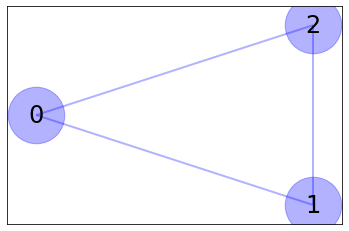

In [7]:
graph = Graph(num_vertices=3)
edge_list = [(0, 1), (1, 2), (0, 2)]
graph.add_edges(edge_list)
draw_graph(graph)

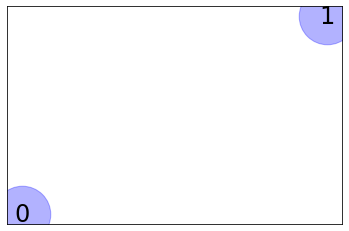

In [8]:
graph = Graph(num_vertices=2)
draw_graph(graph)

Let's create a function that returns all the nodes that can be reached from a certain starting point given the representation of a graph above.

### 1a. Fill out the following method to find the connected components from a starting node on a graph.

In [9]:
def find_connected_component(graph: Graph, starting_node: Vertex) -> Set[Vertex]:
    """
    Return a list of connected components of the graph connected to a starting node.
    Make sure there aren't duplicates! 

    Hint: Perform a breadth- or depth-first search and return the set of vertices 
    reached. Be warned that recursive solutions will not work very well,
    because Python will throw a RecursionError in later cells due to the
    size of the call stack.
    """
    visited = set()
    ### YOUR CODE HERE
    q = [starting_node]
    visited.add(starting_node)
    while q:
        u = q.pop(0)
        for v in graph.get_neighbors(u):
            if v in visited: continue
            q.append(v)
            visited.add(v)
    ### END YOUR CODE
    return visited

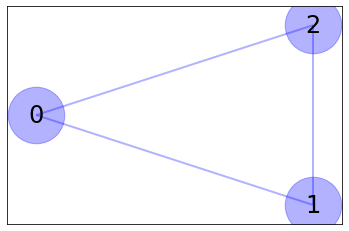

In [10]:
graph = Graph(num_vertices=3)
edge_list = [(0, 1), (1, 2), (0, 2)]
graph.add_edges(edge_list)
draw_graph(graph)
assert find_connected_component(graph, 0) == {0, 1, 2}

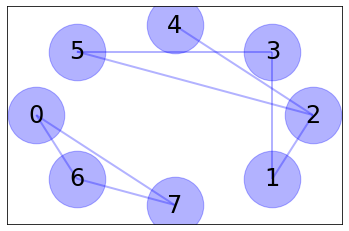

In [11]:
graph = Graph(num_vertices=8)
edge_list = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (0, 6), (6, 7), (0, 7)]
graph.add_edges(edge_list)
draw_graph(graph)
assert find_connected_component(graph, 0) == {0, 6, 7}
assert find_connected_component(graph, 1) == {1, 2, 3, 4, 5}

### 1b. Fill out the following method that takes and returns all the connected components of the graph.

You may want to use the function you wrote above.

In [12]:
def connected_components(graph: Graph) -> Iterable[Set[Vertex]]:
    """
    Return a list of sets containing the connected components of the graph.
    Make sure there aren't duplicates! 

    Consider using the `find_connected_component()` function defined earlier.
    Also, for efficiency reasons, please keep track of which vertices have already
    appeared in a prior connected component to avoid making unnecessary calls
    to `find_connected_component()`; otherwise the later cells will be very slow.
    """
    components = []
    ### YOUR CODE HERE
    visited = set()
    for u in graph.vertices:
        if u not in visited:
            c = find_connected_component(graph, u)
            components.append(c)
            visited |= c
    ### END YOUR CODE
    return components

component_sizes = lambda graph: [
    len(component) for component in (connected_components(graph))
]
largest_component_size = lambda graph: max(component_sizes(graph))

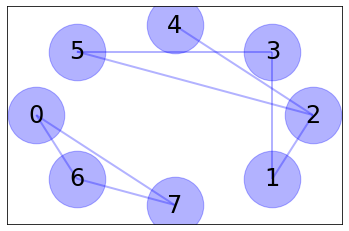

In [13]:
graph = Graph(num_vertices=8)
edge_list = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (0, 6), (6, 7), (0, 7)]
graph.add_edges(edge_list)
draw_graph(graph)

components = connected_components(graph)
assert len(components) == 2
assert {0, 6, 7} in components
assert {1, 2, 3, 4, 5} in components
assert largest_component_size(graph) == 5

Next, we want to create a function that, given the number of nodes in a graph, will randomly generate edges between nodes. That is, we want to construct a random graph following the Erdős–Rényi model.

### 1c. Fill out the following function to create an Erdős–Rényi random graph $\operatorname{G}(n,p)$.

In [14]:
def G_ER(n: int, p: float) -> Graph:
    """
    Create a random graph G(n, p).
    Consider using `graph.add_edge()` and `np.random.rand()`.
    """
    graph = Graph(n)
    for u, v in itertools.combinations(graph.vertices, 2):
        ### YOUR CODE HERE
        if np.random.uniform() < p:
            graph.add_edge(u, v)
        ### END YOUR CODE
    return graph

Make sure you can see all nodes from 0 to 9 in the graph below -- if not, check your code!

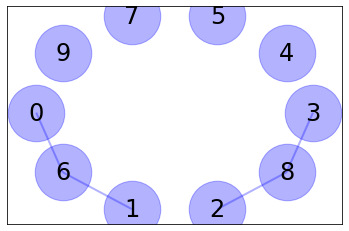

In [15]:
graph = G_ER(10, 0.1)
draw_graph(graph)

## Question 2 -- Properties

Now, let's run a few experiments to examine the properties of an Erdős - Rényi random graph.

#### Part 1

First, for each value of p below, generate 100 ER graphs with n=100 vertices, and find the empirical probability of an ER graph being fully connected. 

In [16]:
p_vals = [0.9**i for i in range(15, 55)]
num_trials = 100
n = 100

empirical_probs = []
for p in p_vals:
    ### YOUR CODE HERE
    cnt = 0
    for _ in range(num_trials):
        erg = G_ER(n, p)
        cc = connected_components(erg)
        if len(cc) == 1:
            cnt += 1
    empirical_probs.append(cnt/num_trials)
    ### END YOUR CODE

Plot the empirical probabilities against values of p. We recommend using a log scale for the x-axis.

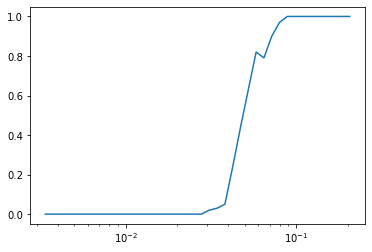

In [17]:
### YOUR CODE HERE
fig, ax = plt.subplots()
ax.plot(p_vals, empirical_probs)
ax.set_xscale('log')
### END YOUR CODE

#### What is the threshold in which with high probability, the graph is connected? Draw a vertical line at that threshold. Give a mathematical answer, and tell us whether or not it is supported in your graph.

Hint: Take a look at the Isolated Vertices question in your homework. 

#### YOUR ANSWER HERE

*From the homework, we see that if $p>\tfrac{(1+\epsilon)\ln n}{n}$, then a graph in $\operatorname{G}(n,p)$ will almost surely be fully connected. This can be seen in the graph above, where the empirical probabilities to the right of the red line are all close to 1.*

#### Part 2
Now, for each value of p below, generate 100 ER graphs with n=100 vertices, and find the empirical probability of an ER graph having no connected components of size larger than $\log(n)$. Plot the empirical probabilities against values of p. We recommend using a log scale for the x-axis.

In [18]:
p_vals = [0.9**i for i in range(20, 65)]
num_trials = 100
n = 100

empirical_probs = []
for p in p_vals:
    ### YOUR CODE HERE
    cnt = 0
    for _ in range(num_trials):
        erg = G_ER(n, p)
        cc = connected_components(erg)
        flag = False
        for c in cc:
            if len(c) > np.log(n):
                flag = True
                break
        if not flag:
            cnt += 1
    empirical_probs.append(cnt/num_trials)
    ### END YOUR CODE

Then, plot the empirical probabilities against values of p. We recommend using a log scale for the x-axis.

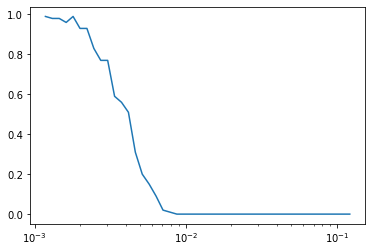

In [19]:
### YOUR CODE HERE
fig, ax = plt.subplots()
ax.plot(p_vals, empirical_probs)
ax.set_xscale('log')
### END YOUR CODE

#### From your graph, what is the threshold in which with high probability, the graph has no connected components of size larger than $\operatorname{O}(\log(n))$? Draw a vertical line at the threshold.

Hint: Take a look at the value of n*p.

#### YOUR ANSWER HERE

*From the graph, we see that if if $np < 1$, then a graph $\operatorname{G}(n, p)$ will almost surely have no connected components of size larger than $\operatorname{O}(\log(n))$.*

Cool! Now we've experimentally verified several results of the Erdős–Rényi graph. 

Isn't it neat that you can rigorously formalize this kind of qualitative behavior of a graph, and then clearly see them in simulation? 

## Question 3 -- The Stochastic Block Model

So far we've discussed the Erdős–Rényi model of a random graph $G(n,p)$. There are extensions that are better, more realistic models in many situations.

As a motivating example, consider the graph formed by friendships of Berkeley students and Stanford students on Facebook.  The probability of a friendship between two students both attending UC Berkeley is much higher than the probability that a student from UC Berkeley is friends with a student from Stanford. In the Erdos-Renyi model, however, the two edges formed by these friendships have the same probability!

In this section, we will explore communities such as the following:

<!-- <img src="https://data.graphstream-project.org/talks/CSSS2012/media/Community_Structure2.jpg" width=300 /> -->
<img src="images/community_structure_visualization.jpeg" width=300>

How will we do this? Use the <b>stochastic block model</b> (let's call it SBM) -- we have graphs of $G(n,p,q)$ (for simplicity, let's assume $n$ is even and $p>q$). 

In this model, we have two "communities" each of size $\frac{n}{2}$ such that the probability of an edge existing between any two nodes within a community is $p$ and the probability of an edge between the two communities is $q$.

<!-- <img src="http://i.imgur.com/JAPqQNf.png" width="400" height="400" /> -->
<img src="images/sbm_before_recovery.png" width="400" height="400">

Our goal will be to recover the original communities. For this example, the result would look something like:

<!-- <img src="http://i.imgur.com/Ec2Xehs.png" width="450" height="450" /> -->
<img src="images/sbm_after_recovery.png" width="450" height="450">

Let's begin by defining a function to generate graphs according to the stochastic block model.

### 3a. Fill out the following function to create a graph $G(n,p,q)$ according to the SBM.

**Important Note**: make sure that the first $\frac{n}{2}$ nodes are part of community A and the second $\frac{n}{2}$ nodes are part of community B.

We will be using this assumption for later questions in this lab, when we try to recover the two communities.

In [20]:
def G_SBM(n: int, p: float, q: float) -> Graph:
    """
    Create a copy of G(n, p, q) with 2 community where the first 
    n/2 nodes are part of the first community and the second n/2 
    nodes are part of second community.

    Consider using the provided graph.add_edge() function.
    """
    assert n % 2 == 0
    assert p > q
    graph = Graph(n)
    mid = n // 2
    communityA = graph.vertices[:mid]
    communityB = graph.vertices[mid:]
    for u, v in itertools.combinations(communityA, 2):
        ### YOUR CODE HERE
        if np.random.uniform() < p:
            graph.add_edge(u, v)
        ### END YOUR CODE
    for u, v in itertools.combinations(communityB, 2):
        ### YOUR CODE HERE
        if np.random.uniform() < p:
            graph.add_edge(u, v)
        ### END YOUR CODE
    for u, v in itertools.product(communityA, communityB): 
        ### YOUR CODE HERE
        if np.random.uniform() < q:
            graph.add_edge(u, v)
        ### END YOUR CODE
    return graph

Let's try testing this out with an example graph -- check that it looks right!

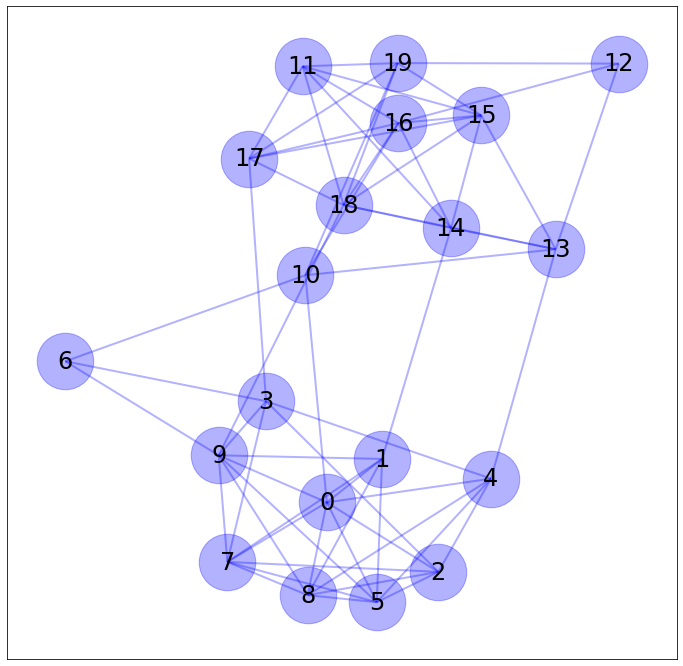

In [21]:
graph = G_SBM(20, 0.6, 0.05)
plt.figure(figsize=(12, 12))
draw_graph(graph,graph_layout='spring')

Now recall the previous example:

<img src="http://i.imgur.com/Ec2Xehs.png" width="450" height="450" />


How did we determine the most likely assignment of nodes to communities?

An intuitive approach is to find the **min-bisection** -- the split of $G$ into 2 groups each of size $\frac{n}{2}$ that has the *minimum total edges crossing the partition*. The intuition here is that we want to **minimize** friendships across communities, as under our assumptions, **p > q** so it is more likely to be friends within a community than across. Notice, if we assume that **p < q**, then we would have been interested in the max-bisection.

It turns out that this approach is the optimal method of recovering community assignments in terms of maximizing over all possible partitions the probability of seeing the graph $G$ given a community partition. This is called the Maximum Likelihood Estimate (MLE) of the partition given the graph G. It is an interesting exercise to prove this which you can try if you would like. You will prove this result in homework when we go over Maximum Likelihood Estimation and Maximum A Posteriori Estimation.

### 3b. Given a graph $G(n,p,q)$, write a function to find the maximum likelihood estimate of the two communities.

In [22]:
def count_crossing_edges(community: Set[Vertex], graph: Graph) -> int:
    """
    Find the number of edges cross the partition between this community 
    and the rest of the vertices in the graph.
    """
    other = set(graph.vertices).difference(set(community))
    num_crossings = 0
    ### YOUR CODE HERE
    for u, es in graph.adjacency_lists.items():
        for v in es:
            if not ((u in community) ^ (v not in community)):
                num_crossings += 1
    ### END YOUR CODE
    return num_crossings

def mle(graph: Graph) -> Iterable[Vertex]:
    """
    Tries every possible way to partition the graph into communities of equal
    size and returns the partition with the fewest number of edges crossing 
    between the communites.
    """
    possible_comms = set(
        itertools.combinations(graph.vertices, len(graph.vertices)//2)
    )
    return min(possible_comms, key=lambda comm: count_crossing_edges(comm, graph))

Here's a quick test for your MLE function -- check that the resulting partitions look okay!

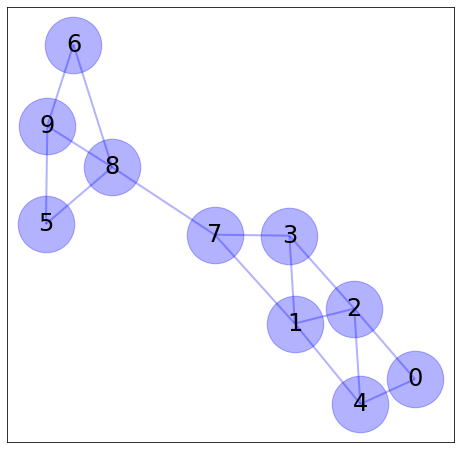

In [23]:
graph = G_SBM(10, 0.6, 0.05)
plt.figure(figsize=(8, 8))
draw_graph(graph,graph_layout='spring')

In [24]:
community = mle(graph)
assert len(community) == 5

print('The community found is the nodes', community)

The community found is the nodes (5, 6, 7, 8, 9)


Now recall that important note from earlier -- in the graphs we generate, the first $\frac{n}{2}$ nodes are from community A and the second $\frac{n}{2}$ nodes from community B.

We can therefore test whether or not our MLE method accurately recovers these two communities from randomly generated graphs that we generate. In this section we will simulate the probability of exact recovery using MLE.

### 3c (Optional). Write a function to simulate the probability of exact recovery through MLE given $n,p,q$. 

In [25]:
def prob_recovery(n: int, p: float, q: float) -> float:
    """
    Simulate the probability of exact recovery through MLE.
    Use 100 samples.
    """
    ### YOUR CODE HERE
    num_trials = 100
    cnt = 0
    for _ in range(num_trials):
        sbmg = G_SBM(n, p, q)
        c = mle(sbmg)
        if len(c) == n//2: 
            if (min(c) == 0 and max(c) == n//2-1) or (min(c) == n//2 and max(c) == n-1):
                cnt += 1
    return cnt / num_trials
    ### END YOUR CODE

Here's a few examples to test your simulation:

In [26]:
print("P(recovery) for n=10, p=0.5, q=0.05 --", prob_recovery(10, 0.5, 0.05)) # usually recovers
print("P(recovery) for n=10, p=0.92, q=0.06 --", prob_recovery(10, 0.92, 0.06))  # almost certainly recovers
print("P(recovery) for n=10, p=0.12, q=0.06 --", prob_recovery(10, 0.12, 0.06))  # almost certainly fails

P(recovery) for n=10, p=0.5, q=0.05 -- 0.91
P(recovery) for n=10, p=0.92, q=0.06 -- 1.0
P(recovery) for n=10, p=0.12, q=0.06 -- 0.03


### 3d (Optional). Can you find a threshold on $(p, q, n)$ for exact recovery through MLE?

It turns out that there is a threshold on $(p,q,n)$ for a phase transition which determines whether or not the communities can be recovered using MLE.

This part of the lab is meant to be open-ended. You should use the code you've already written to help arrive at an expression for threshold in the form

$$f(p,q,n) > 1$$

After this threshold, can almost recover the original communities in the SBM.

Define the following:
$$\alpha=p\frac{\log n}{n}$$
$$\beta=q\frac{\log n}{n}$$

The threshold for exact recovery occurs at
$$\frac{\alpha + \beta}{2} - \sqrt{\alpha\beta} > 1$$

Those curious are encouraged to check out the paper [Exact Recovery in the Stochastic Block Model](http://arxiv.org/pdf/1405.3267.pdf) (Abbe, Bandeira, Hall)

Congratulations! You've reached the end of the lab.

## References

1. https://www.udacity.com/wiki/creating-network-graphs-with-python